<a href="https://colab.research.google.com/github/Bunnykey/PFDS/blob/master/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [16]:
data = pd.read_csv("/content/drive/My Drive/spambase.data", header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Attribute Information:

The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes:

48 continuous real [0,100] attributes of type word_freq_WORD
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string.

6 continuous real [0,100] attributes of type char_freq_CHAR]
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail

1 continuous real [1,...] attribute of type capital_run_length_average
= average length of uninterrupted sequences of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_longest
= length of longest uninterrupted sequence of capital letters

1 continuous integer [1,...] attribute of type capital_run_length_total
= sum of length of uninterrupted sequences of capital letters
= total number of capital letters in the e-mail

1 nominal {0,1} class attribute of type spam
= denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail.



In [19]:
target = data[57]
target

0       1
1       1
2       1
3       1
4       1
       ..
4596    0
4597    0
4598    0
4599    0
4600    0
Name: 57, Length: 4601, dtype: int64

In [ ]:
df = pd.DataFrame(data)

In [52]:
y = df.loc[:, 57] # data
X = df.loc[:, 0:56] # target
X, y

(        0     1     2    3     4     5   ...     51     52     53     54   55    56
 0     0.00  0.64  0.64  0.0  0.32  0.00  ...  0.778  0.000  0.000  3.756   61   278
 1     0.21  0.28  0.50  0.0  0.14  0.28  ...  0.372  0.180  0.048  5.114  101  1028
 2     0.06  0.00  0.71  0.0  1.23  0.19  ...  0.276  0.184  0.010  9.821  485  2259
 3     0.00  0.00  0.00  0.0  0.63  0.00  ...  0.137  0.000  0.000  3.537   40   191
 4     0.00  0.00  0.00  0.0  0.63  0.00  ...  0.135  0.000  0.000  3.537   40   191
 ...    ...   ...   ...  ...   ...   ...  ...    ...    ...    ...    ...  ...   ...
 4596  0.31  0.00  0.62  0.0  0.00  0.31  ...  0.000  0.000  0.000  1.142    3    88
 4597  0.00  0.00  0.00  0.0  0.00  0.00  ...  0.353  0.000  0.000  1.555    4    14
 4598  0.30  0.00  0.30  0.0  0.00  0.00  ...  0.000  0.000  0.000  1.404    6   118
 4599  0.96  0.00  0.00  0.0  0.32  0.00  ...  0.000  0.000  0.000  1.147    5    78
 4600  0.00  0.00  0.65  0.0  0.00  0.00  ...  0.125  0.000  0.00

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
def leakyReLU(x, alpha=0.0001):
  if x < 0:
    f = alpha * x
  else:
    f = x
  return f

from sklearn.metrics import accuracy_score
trainHatList = []
testHatList = []
funclist = ['relu','identity','logistic','tanh']
for function in funclist:
  clf = MLPClassifier(hidden_layer_sizes=100, activation = function, solver = 'adam', max_iter=1000)
  clf.fit(X_train_scaled, y_train)
  y_train_hat = clf.predict(X_train)
  print('train accuracy :', accuracy_score(y_train, y_train_hat))
  trainHatList.append(y_train_hat)
  y_test_hat = clf.predict(X_test)
  print('test accuracy :', accuracy_score(y_test, y_test_hat))
  testHatList.append(y_test_hat)

train accuracy : 0.46366459627329193
test accuracy : 0.4880521361332368
train accuracy : 0.4751552795031056
test accuracy : 0.5068790731354091
train accuracy : 0.44503105590062114
test accuracy : 0.4721216509775525
train accuracy : 0.44596273291925465
test accuracy : 0.47646632874728456


[0.46366459627329193, 0.4751552795031056, 0.44503105590062114, 0.44596273291925465]


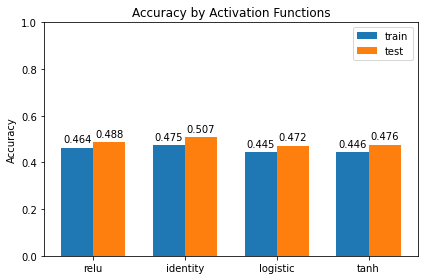

In [74]:
# visualization
labels = ['relu', 'identity', 'logistic', 'tanh']
x = np.arange(len(labels))
width = 0.35

trainScores = []
testScores = []
for i in trainHatList:
  trainScores.append(accuracy_score(y_train,i))
for i in testHatList:
  testScores.append(accuracy_score(y_test,i))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trainScores, width, label='train')
rects2 = ax.bar(x + width/2, testScores, width, label='test')

ax.set_ylim(0,1.0)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Activation Functions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        pyheight = round(height,3)
        ax.annotate('{}'.format(pyheight),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

Why ReLU?

어차피 성능 차이 크게 안보일 바에는 속도면에서 ReLU가 훨씬 드라마틱하게 빠르기 때문에 이득이라고 할 수 있다!

다만 x <= 0 인 값들에 대하여 gradient vanishing이 발생할 수 있기 때문에 다른 함수를 쓰는게 나을 수 있다.

예를 들어... leakyReLU?

In [ ]:
def leakyReLU(x, alpha=0.0001):
  if x < 0:
    f = alpha * x
  else:
    f = x
  return f

# tried to apply on the package, but not enough time to unpack the whole things :(

train accuracy : 0.4673913043478261
test accuracy : 0.4952932657494569
train accuracy : 0.4649068322981366
test accuracy : 0.49239681390296886
train accuracy : 0.4652173913043478
test accuracy : 0.49312092686459086
train accuracy : 0.4785714285714286
test accuracy : 0.5061549601737871
train accuracy : 0.4608695652173913
test accuracy : 0.49167270094134685


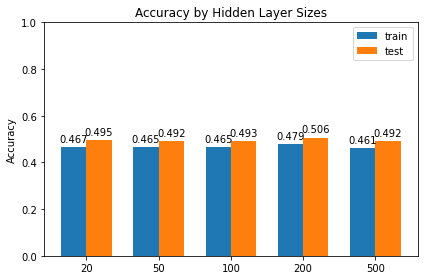

In [76]:
layerSize = [20,50,100,200,500]

trainHatList = []
testHatList = []

for layer in layerSize:
  clf = MLPClassifier(hidden_layer_sizes=layer, activation = 'relu', solver = 'adam', max_iter=1000)
  clf.fit(X_train_scaled, y_train)
  y_train_hat = clf.predict(X_train)
  print('train accuracy :', accuracy_score(y_train, y_train_hat))
  trainHatList.append(y_train_hat)
  y_test_hat = clf.predict(X_test)
  print('test accuracy :', accuracy_score(y_test, y_test_hat))
  testHatList.append(y_test_hat)

# visualization
labels = ['20', '50', '100', '200','500']
x = np.arange(len(labels))
width = 0.35

trainScores = []
testScores = []
for i in trainHatList:
  trainScores.append(accuracy_score(y_train,i))
for i in testHatList:
  testScores.append(accuracy_score(y_test,i))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, trainScores, width, label='train')
rects2 = ax.bar(x + width/2, testScores, width, label='test')

ax.set_ylim(0,1.0)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Hidden Layer Sizes')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        pyheight = round(height,3)
        ax.annotate('{}'.format(pyheight),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()